In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist



In [3]:
# 2. Cargar los datos
df = pd.read_csv('mall_customers.csv')  

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        2  
1        2  
2        5  
3        2  
4        5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster    

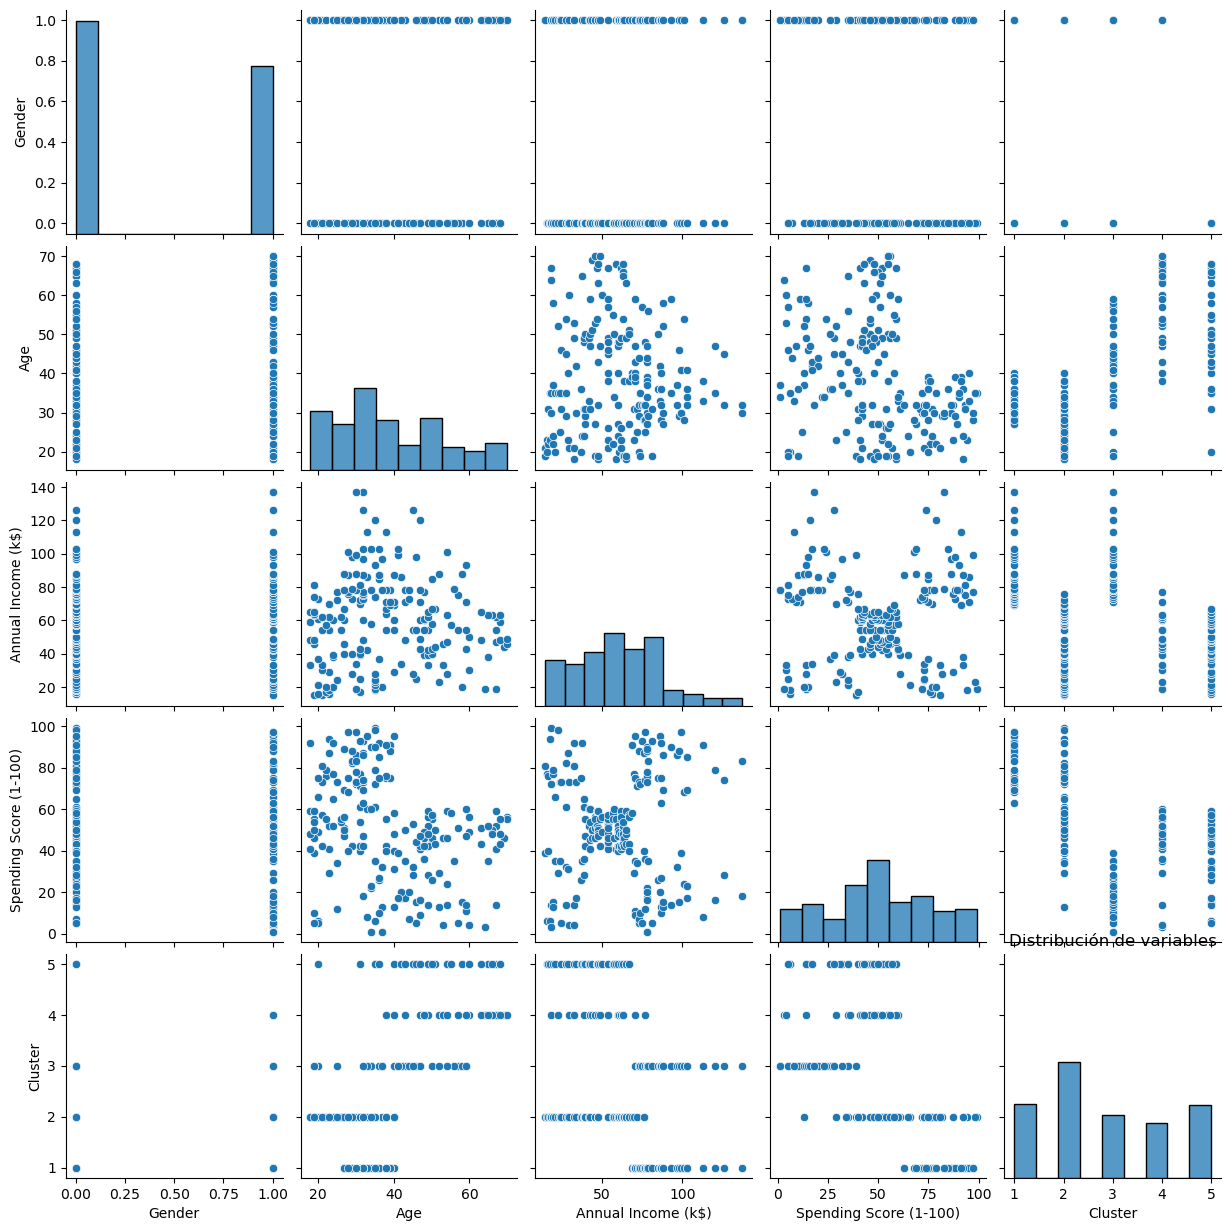


Valores nulos:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


In [14]:
# 3. Análisis exploratorio
print(df.head())
print(df.info())
print(df.describe())
sns.pairplot(df.drop(columns=["CustomerID"]))
plt.title("Distribución de variables")
plt.show()

# Verificar valores faltantes
print("\nValores nulos:\n", df.isnull().sum())






In [10]:
# 4. Preprocesamiento
# Codificar variable categórica
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Imputación de valores faltantes 
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=["CustomerID"])),
                          columns=df.drop(columns=["CustomerID"]).columns)

# Escalado
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)


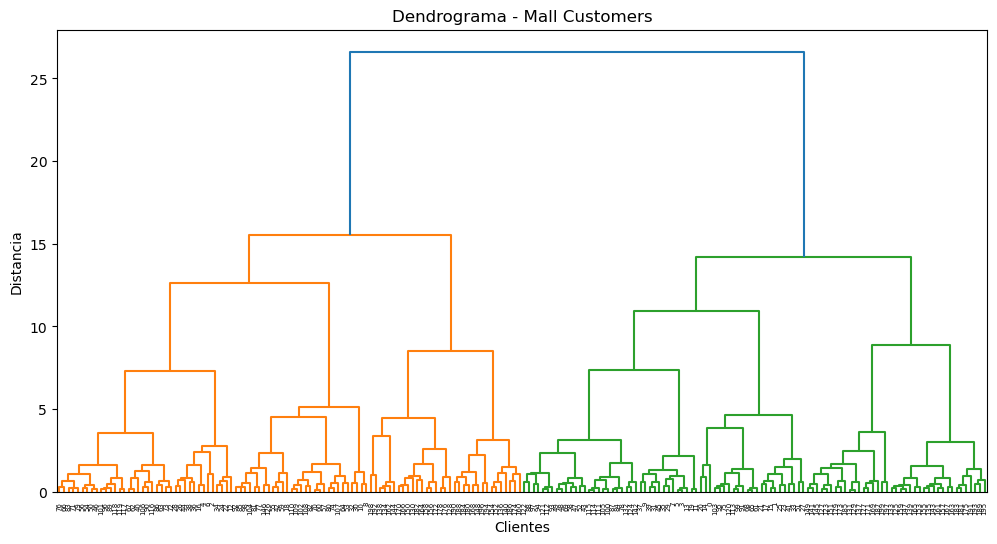

In [11]:
# 6. Entrenamiento del modelo (Hierarchical Clustering)
linked = linkage(scaled_data, method='ward')
# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma - Mall Customers')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

# Selección de número de clusters
num_clusters = 5
clusters = fcluster(linked, num_clusters, criterion='maxclust')
df['Cluster'] = clusters


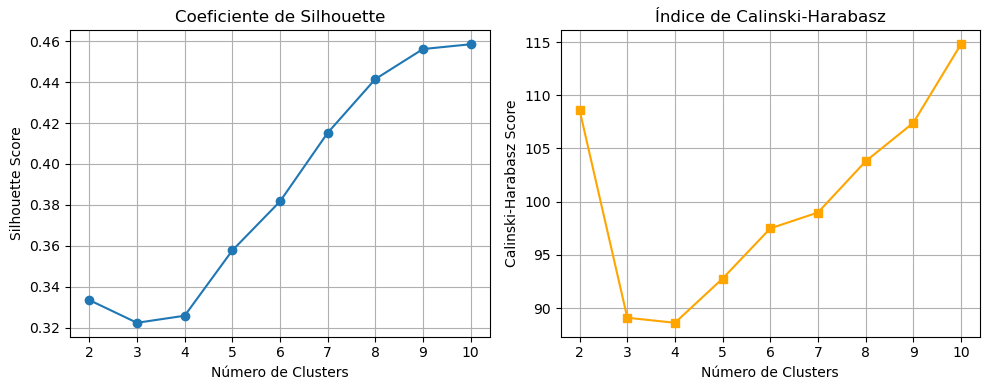

In [15]:
# 6. Evaluación con diferentes valores de k 
silhouette_scores = []
calinski_scores = []
range_n_clusters = range(2, 11)

for k in range_n_clusters:
    labels = fcluster(linked, k, criterion='maxclust')
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    calinski_scores.append(calinski_harabasz_score(scaled_data, labels))

# Gráficos de Silhouette y Calinski-Harabasz
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, calinski_scores, marker='s', color='orange')
plt.title('Índice de Calinski-Harabasz')
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# 7. Evaluación del modelo
silhouette = silhouette_score(scaled_data, clusters)
calinski = calinski_harabasz_score(scaled_data, clusters)
print(f"\nCoeficiente de Silhouette: {silhouette:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski:.2f}")



Coeficiente de Silhouette: 0.36
Índice de Calinski-Harabasz: 92.77


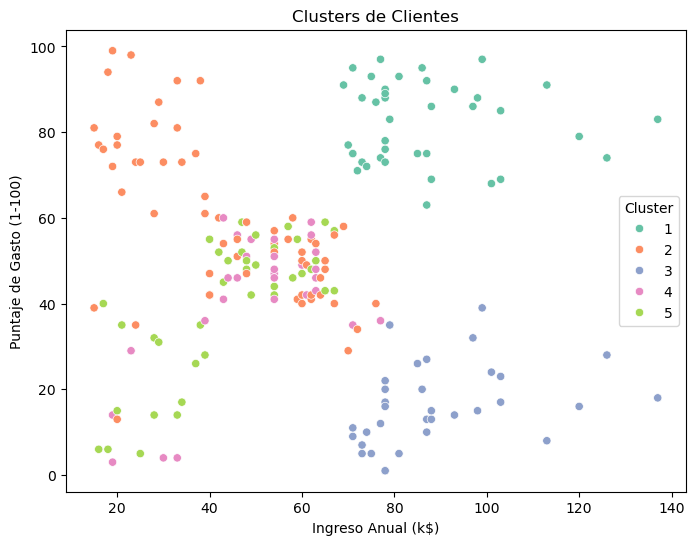

In [9]:
# 8. Visualización de resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='Set2')
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

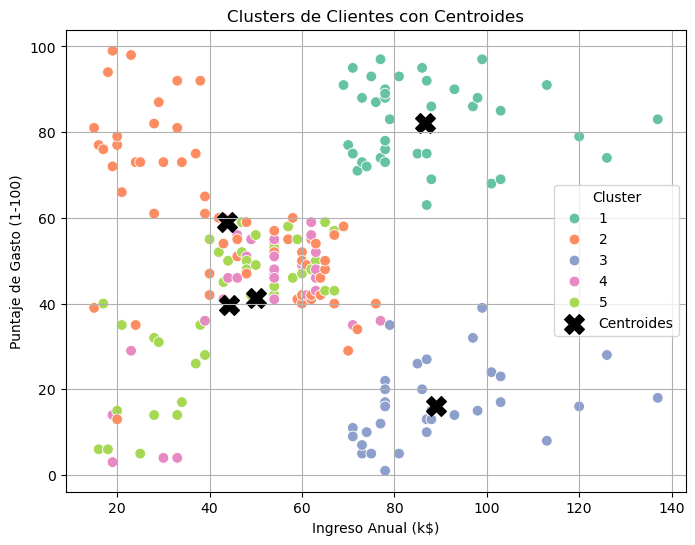

In [16]:
# 8. Visualización final de clusters con centroides
plt.figure(figsize=(8, 6))

# Gráfico de los puntos
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='Set2', legend='full', s=60)

# Calcular centroides
centroids = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

# Añadir centroides al gráfico
plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'],
            s=200, c='black', marker='X', label='Centroides')

plt.title('Clusters de Clientes con Centroides')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
